# PyVIMS

This notebook provide and a set of example of how to manipulate the Cassini VIMS data using the python [`pyvims`](https://pypi.org/project/pyvims/) module.

In [1]:
import os

import wget

import matplotlib.pyplot as plt
from pyvims import VIMS

## Get some data

To start this example your need to download some data. Here we will start with a cube ([`1487096932_1`](https://vims.univ-nantes.fr/cube/1487096932_1)) calibrated with [USGS-ISIS3](https://isis.astrogeology.usgs.gov/fixit/projects/isis/wiki/Working_with_Cassini_VIMS) sofware and available on the [vims.univ-nantes.fr](https://vims.univ-nantes.fr) data portal:

In [2]:
vims_website = 'https://vims.univ-nantes.fr'

image_id = '1487096932_1'

for channel in ['vis', 'ir']:
    for cube_type in ['cal', 'nav']:
        fname = cube_type[0].upper() + image_id + '_' + channel + '.cub'

        if not os.path.isfile(fname):
            url = '/'.join([vims_website, channel, cube_type, image_id])

            print('Downloading {}'.format(fname))
            wget.download(url, out=fname)

## Loading a cube file

In [3]:
cube = VIMS('1487096932_1')

cube

VIMS cube: 1487096932_1 [ISIS3]

## Extract some metadata

The `VIMS` object provide a direct access to a subset of the cube metedata (extracted from the file header with the [`pvl`](https://github.com/planetarypy/pvl) module).

Here is a list of the metadata available about the capture time:

In [4]:
# Acquisition start time (as `datetime` object)
print('Start: {}'.format(cube.start))

# Acquisition stop time (as `datetime` object)
print('Stop: {}'.format(cube.stop))

# Acquisition mid-time (as `datetime` object or `%Y-%m-%dT%H:%M:%S.%f` format)
print('Mid-Time: {} / {}'.format(cube.dtime,cube.time))

# Image year
print('Year: {}'.format(cube.year))

# Image day of the year
print('DOY: {}'.format(cube.doy))

# Image decimal year
print('Decimal year: {}'.format(cube.year_d))

# Image date (as `%Y/%m/%d` format)
print('Date: {}'.format(cube.date))

Start: 2005-02-14 18:02:29.023000
Stop: 2005-02-14 18:07:32.930000
Mid-Time: 2005-02-14 18:05:00.976500 / 2005-02-14T18:05:00.976500
Year: 2005
DOY: 45
Decimal year: 2005.1205479452055
Date: 2005/02/14


## Plot data

Plot image for a specific wavelength (ie auto-select the closest band):

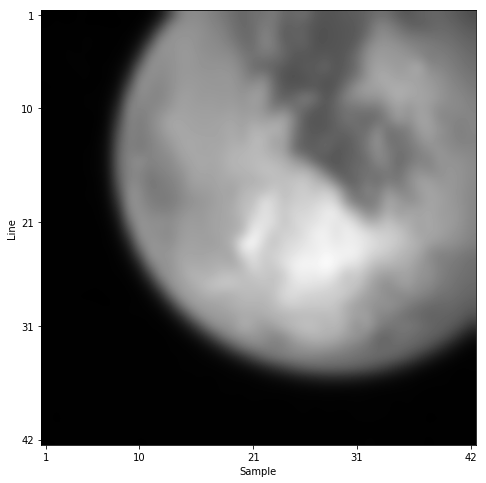

In [5]:
img = cube.getImg(wvln=2.03)

plt.figure(figsize=(8, 8))

plt.imshow(img, cmap='gray', extent=cube.extent, interpolation='bicubic')

plt.xticks(cube.sticks)
plt.yticks(cube.lticks)

plt.xlabel('Sample')
plt.ylabel('Line');

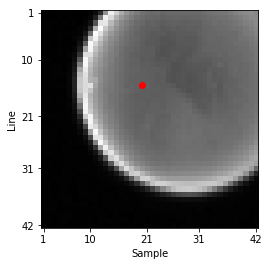

In [6]:
plt.imshow(cube.getImg(wvln=2.12), cmap='gray', extent=cube.extent)

plt.plot(20, 15, 'ro')

plt.xticks(cube.sticks)
plt.yticks(cube.lticks)

plt.xlabel('Sample')
plt.ylabel('Line');

Plot spectrum for a specific pixel (red dot in the previous image):

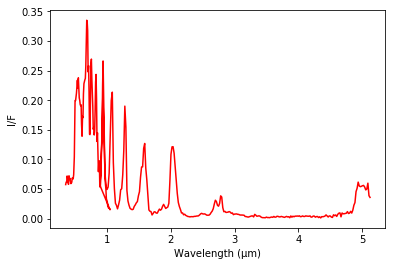

In [7]:
plt.plot(cube.wvlns, cube.getSpec(S=20, L=15), 'r-')

plt.xlabel('Wavelength (µm)')
plt.ylabel('I/F');